# PROBLEM 9: Calibration and Prediction

## INTRODUCTION

_Groundwater models are usually applied either to conceptualize and understand a
hydrologic system or to predict the outcome of a future change to the system. In order to provide some assurance that the model reflects the behavior or appearance of the flow system, it must be calibrated prior to use as a predictive tool. Calibration involves matching modeled results to observed data. This usually includes_ [hydraulic heads](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#h), [drawdowns](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#d), _induced_ [discharge](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#d) _and/or induced_ [recharge](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#r). _In the process of obtaining a match, aquifer parameters, such as_ [transmissivity](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#t), [leakance](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#l), [storage coefficient](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#s), _or the attributes of [boundary conditions](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#b) _are adjusted within reasonable ranges until a satisfactory match is obtained. Once the modeler is convinced that the model replicates current system behavior, and that it is capable of replicating future behavior, it may be used in a predictive mode. This problem provides an exercise in system conceptualization, a simple model calibration, and use as a predictive tool._

## PROBLEM STATEMENT

_The idealized flow system shown in Figure 9.1 is a small, confined aquifer which is strongly controlled by the river which runs across it. The aquifer is approximately 100 ft thick and is composed primarily of silty sand. The river is not in direct hydraulic connection with the aquifer, but acts as a leaky boundary condition which can gain or lose water to the aquifer. Other boundary conditions are no flow, which surround the square and define the areal extent of the aquifer._ [Evapotranspiration](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#e) _and small domestic users in the area may be neglected, although precipitation recharge is significant Stage data for the river as well as river bed elevation determined in an earlier study are shown in Table 9.1._

### Part a
_Given constraints of uniform transmissivity and recharge, and additional data
below, obtain a steady state calibration (history match) based on the potentiometric surface map of Figure 9.1 and the calibration targets shown in Table 9.2._

_grid size: 15 x 15_

_delta x = delta y: 500 ft_

_river base flow at western model boundary: 10 cfs_

_river base flow at eastern model boundary: 11 1/8 cfs_

_River bed conductance: 0.01 ${ft^2}$ per second_

### Table 9.1: River Data

| Row | Column | Stage (ft) | Bottom Elevation (ft) |
|-----|--------|------------|-----------------------|
| 4   | 1      | 100        | 90                    |
| 4   | 2      | 100        | 90                    |
| 4   | 3      | 100        | 90                    |
| 4   | 4      | 99         | 89                    |
| 4   | 5      | 99         | 89                    |
| 5   | 6      | 98         | 88                    |
| 6   | 7      | 97         | 87                    |
| 7   | 8      | 96         | 86                    |
| 8   | 9      | 95         | 85                    |
| 9   | 10     | 94         | 84                    |
| 9   | 11     | 94         | 84                    |
| 9   | 12     | 94         | 84                    |
| 9   | 13     | 94         | 84                    |
| 9   | 14     | 93         | 83                    |
| 9   | 15     | 93         | 83                    |

### Table 9.2: Calibration Targets

| Row | Column | Head (ft) |
|-----|--------|-----------|
| 14  | 1      | 124       |
| 11  | 4      | 119.9     |
| 13  | 13     | 113.9     |
| 8   | 1      | 116.1     |
| 4   | 12     | 113       |
| 9   | 6      | 114       |
| 2   | 3      | 108.5     |
| 11  | 10     | 111.7     |
| 7   | 14     | 107.6     |
| 3   | 8      | 111.3     |
| 2   | 15     | 115.6     |

In [176]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import flopy
#import csv

In [177]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/problem9_grid_data.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]


[ 500.  500.  500.  500.  500.  500.  500.  500.  500.  500.  500.  500.
  500.  500.  500.]
7500.0


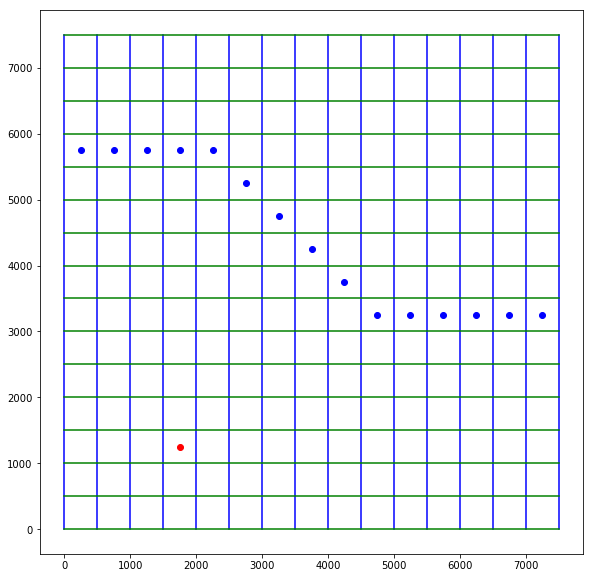

In [178]:
#code to create the grid image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

#create well
x0 = 1750
y0 = 1250
def wel_sp(x0, y0, sym):
    plt.plot(x0, y0, sym)
wel_sp(x0, y0, sym='ro')

#create river
#this is a very basic and tedious way of creating the river, however it's a good idea to try it out because it will
#help you understand how the coordinates work and will give you good practice with for loops
x1 = 250
y1 = 5750
def riv1(x1, y1, sym):
    plt.plot(x1, y1, sym)
riv1(x1, y1, sym='bo')

x2 = 750
y2 = 5750
def riv2(x2, y2, sym):
    plt.plot(x2, y2, sym)
riv2(x2, y2, sym='bo')

x3 = 1250
y3 = 5750
def riv3(x3, y3, sym):
    plt.plot(x3, y3, sym)
riv3(x3, y3, sym='bo')

x4 = 1750
y4 = 5750
def riv4(x4, y4, sym):
    plt.plot(x4, y4, sym)
riv4(x4, y4, sym='bo')

x5 = 2250
y5 = 5750
def riv5(x5, y5, sym):
    plt.plot(x5, y5, sym)
riv5(x5, y5, sym='bo')

x6 = 2750
y6 = 5250
def riv6(x6, y6, sym):
    plt.plot(x6, y6, sym)
riv6(x6, y6, sym='bo')

x7 = 3250
y7 = 4750
def riv7(x7, y7, sym):
    plt.plot(x7, y7, sym)
riv7(x7, y7, sym='bo')

x8 = 3750
y8 = 4250
def riv8(x8, y8, sym):
    plt.plot(x8, y8, sym)
riv8(x8, y8, sym='bo')

x9 = 4250
y9 = 3750
def riv9(x9, y9, sym):
    plt.plot(x9, y9, sym)
riv9(x9, y9, sym='bo')

x10 = 4750
y10 = 3250
def riv10(x10, y10, sym):
    plt.plot(x10, y10, sym)
riv10(x10, y10, sym='bo')

x11 = 5250
y11 = 3250
def riv11(x11, y11, sym):
    plt.plot(x11, y11, sym)
riv11(x11, y11, sym='bo')

x12 = 5750
y12 = 3250
def riv12(x12, y12, sym):
    plt.plot(x12, y12, sym)
riv12(x12, y12, sym='bo')

x13 = 6250
y13 = 3250
def riv13(x13, y13, sym):
    plt.plot(x13, y13, sym)
riv13(x13, y13, sym='bo')

x14 = 6750
y14 = 3250
def riv14(x14, y14, sym):
    plt.plot(x14, y14, sym)
riv14(x14, y14, sym='bo')

x15 = 7250
y15 = 3250
def riv15(x15, y15, sym):
    plt.plot(x15, y15, sym)
riv15(x15, y15, sym='bo')

In [232]:
#Flopy objects
modelname = 'p9_pa' #short for problem 9 part a
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [233]:
#dis package
#call in the discretization package
nlay = 1
nrow = 15
ncol = 15
delr = 500
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 86400. #length of stress period
tsmult = 11 #time step multiplier
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, tsmult=tsmult, steady=False)

In [234]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [236]:
#pcg package
pcg = flopy.modflow.ModflowPcg(mf)

#lpf package
laytyp = np.zeros((nlay))
hk = .01
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, laytyp=laytyp)

#oc package
oc = flopy.modflow.ModflowOc(mf)

In [237]:
#riv package
ipakcb = 0

#create .csv file of the river data
riv_boundary = pd.read_csv('../Data/problem9_riv.csv')
#subtract 1 so that the layer, row, and col match up with pythons rules
riv_boundary.layer -=1
riv_boundary.row -=1
riv_boundary.col -=1
print(riv_boundary.values)

riv_spd = {0: riv_boundary.values}
          
riv = flopy.modflow.ModflowRiv(mf, ipakcb=ipakcb, stress_period_data=riv_spd)

[[  0.00000000e+00   3.00000000e+00   0.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   1.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   2.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   3.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   3.00000000e+00   4.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   4.00000000e+00   5.00000000e+00   9.80000000e+01
    1.00000000e-02   8.80000000e+01]
 [  0.00000000e+00   5.00000000e+00   6.00000000e+00   9.70000000e+01
    1.00000000e-02   8.70000000e+01]
 [  0.00000000e+00   6.00000000e+00   7.00000000e+00   9.60000000e+01
    1.00000000e-02   8.60000000e+01]
 [  0.00000000e+00   7.00000000e+00   8.00000000e+00   9.50000000e+01
    1.00000000e-02   8.50000000e+01]
 [  0.00000000e+00   8.00000000e+00  

In [238]:
#rch package
rech = .2e-7
rch = flopy.modflow.ModflowRch(mf, rech=rech)

# Write the MODFLOW model input files
mf.write_input()

# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p9_pa.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/08/18 14:18:57

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/08/18 14:18:57
 Elapsed run time:  0.018 Seconds

  Normal termination of simulation


# MODEL OUTPUT

## _Figure 9.1. Geometry and potentiometric surface of the aquifer system._

In [239]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p9_pa.hds') #"os.path.join" joins together the model_ws and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
ts = headobj.get_ts([[0, 12, 3]])
print(ts)

[86400.0]
[[ 86400.            106.55925751]]


<a list of 0 text.Text objects>

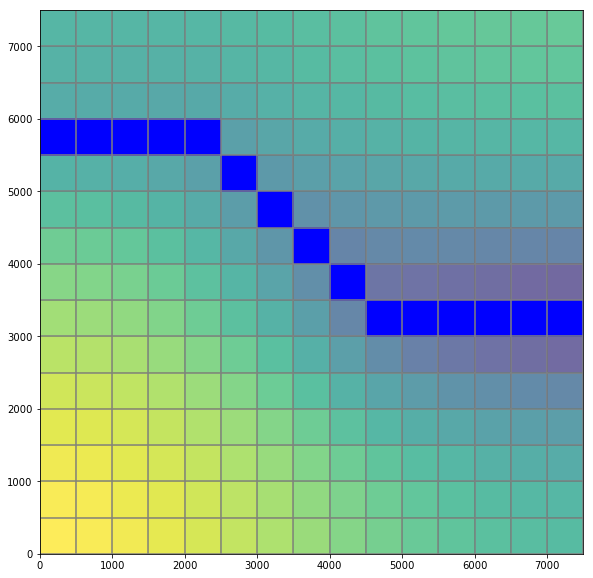

In [241]:
#shows the drawdown at each well 
fname = os.path.join(modelname, 'p9_pa.cbc')
head = headobj.get_data(totim=times[-1])
levels = np.arange(-10, 10, 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(head, masked_values=[999.], alpha=0.5)
modelmap.plot_bc("RIV", color='b')
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[-999.], levels=levels)
plt.clabel(contour_set, inline=1, fontsize=14)

## _Figure 9.2. Hydraulic head arrays, potentiometric surface contour maps, and mass balance summary for Part a._

<a list of 9 text.Text objects>

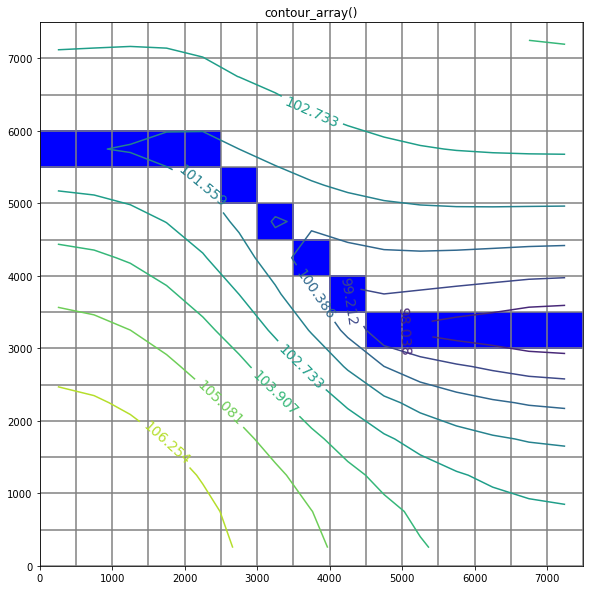

In [251]:
fname = os.path.join(modelname, 'p9_pa.cbc')
head = headobj.get_data(totim=times[-1])
levels = np.linspace(head.min(), head.max(), 10)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_title('contour_array()')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
modelmap.plot_bc("RIV", color='b') #blue squares on map
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[999.], levels=levels)
plt.clabel(contour_set, inline=1, fontsize=14)